# Analyse Factorielle des Correspondances

L'analyse factorielle des correspondances (AFC) est une technique factorielle adaptée au traitement des grands tableaux de contingence, tableaux de comptage croisant deux variables qualitatives.

Elle permet de décomposer les principales associations entre les caractéristiques (les modalités) des variables du tableau de contingence.

__Cet exemple étudie l'association entre la profession des personnes et les médias qu'ils privilégient.__

__Nous utilions le Package fanalysis__

In [1]:
import pandas as pd
from fanalysis.ca import CA #elle nous fait l AFC
import numpy as np

In [2]:
df = pd.read_table("data/ca_data", header=0, index_col=0, delimiter="\t", encoding="utf-8")
df

Radio  Tel.  Quot.Nat.  Quot.Reg.  Press.Mag.  Press.TV
Prof                                                                   
Agriculteur        96   118          2         71          50        17
Petit.Patr.       122   136         11         76          49        41
Prof.Cad.Sup      193   184         74         63         103        79
Prof.Int.         360   365         63        145         141       184
Employe           511   593         57        217         172       306
Ouvr.Qualif.      385   457         42        174         104       220
Ouvr.Non-Qual.    156   185          8         69          42        85
Inactif          1474  1931        181        852         642       782

In [3]:
X = df.values
n=np.sum(X)

In [3]:
print(n)

NameError: name 'n' is not defined

In [4]:
# Ajouter la somme de répetition par ligne et par colonne 
X_ligne = np.append(X,[[np.sum(X[i])] for i in range(len(X))], axis = 1)
print(X_ligne)
X_ligne_colonne = np.append(X_ligne, [[np.sum(X_ligne[:,j]) for j in range(X_ligne.shape[1])]], axis = 0)
print(X_ligne_colonne)

[[  96  118    2   71   50   17  354]
 [ 122  136   11   76   49   41  435]
 [ 193  184   74   63  103   79  696]
 [ 360  365   63  145  141  184 1258]
 [ 511  593   57  217  172  306 1856]
 [ 385  457   42  174  104  220 1382]
 [ 156  185    8   69   42   85  545]
 [1474 1931  181  852  642  782 5862]]
[[   96   118     2    71    50    17   354]
 [  122   136    11    76    49    41   435]
 [  193   184    74    63   103    79   696]
 [  360   365    63   145   141   184  1258]
 [  511   593    57   217   172   306  1856]
 [  385   457    42   174   104   220  1382]
 [  156   185     8    69    42    85   545]
 [ 1474  1931   181   852   642   782  5862]
 [ 3297  3969   438  1667  1303  1714 12388]]


In [5]:
#Récuperer les valeurs du tableau et calculer les valeurs des f_ij
X_fij = np.round(X_ligne_colonne/n, decimals = 3)
X_fij

array([[0.008, 0.01 , 0.   , 0.006, 0.004, 0.001, 0.029],
       [0.01 , 0.011, 0.001, 0.006, 0.004, 0.003, 0.035],
       [0.016, 0.015, 0.006, 0.005, 0.008, 0.006, 0.056],
       [0.029, 0.029, 0.005, 0.012, 0.011, 0.015, 0.102],
       [0.041, 0.048, 0.005, 0.018, 0.014, 0.025, 0.15 ],
       [0.031, 0.037, 0.003, 0.014, 0.008, 0.018, 0.112],
       [0.013, 0.015, 0.001, 0.006, 0.003, 0.007, 0.044],
       [0.119, 0.156, 0.015, 0.069, 0.052, 0.063, 0.473],
       [0.266, 0.32 , 0.035, 0.135, 0.105, 0.138, 1.   ]])

On crée une instance de la classe CA, en lui passant ici des étiquettes pour les lignes et les colonnes. Ces paramètres sont facultatifs ; en leur absence, le programme détermine automatiquement des étiquettes.

In [6]:
my_ca = CA(row_labels=df.index.values, col_labels=df.columns.values,n_components=2)

On estime le modèle en appliquant la méthode fit de la classe CA sur le jeu de données.

In [7]:
my_ca.fit(X)

CA(col_labels=array(['Radio', 'Tel.', 'Quot.Nat.', 'Quot.Reg.', 'Press.Mag.',
       'Press.TV'], dtype=object),
   n_components=2,
   row_labels=array(['Agriculteur', 'Petit.Patr.', 'Prof.Cad.Sup', 'Prof.Int.',
       'Employe', 'Ouvr.Qualif.', 'Ouvr.Non-Qual.', 'Inactif'],
      dtype=object))

L'exécution de la méthode my_ca.fit(X) provoque a minima le calcul des attributs :

* my_ca.eig_ : valeurs propres
* my_ca.row_coord_ : coordonnées des points lignes
* my_ca.col_coord_ : coordonnées des points colonnes

## Analyse des valeurs propres
L'attribut my_ca.eig_ contient :

* en 1ère ligne : les valeurs propres en valeur absolue
* en 2ème ligne : les valeurs propres en pourcentage de la variance totale
* en 3ème ligne : les valeurs propres en pourcentage cumulé de la variance totale

In [8]:
#Affichage des valeurs propres
print(my_ca.eig_[0])

[0.01385729 0.00721068]


In [9]:
#Pourcentage de l'inertie exprimé par chaque axe
print(my_ca.eig_[1])

[62.19818064 32.36502878]


In [10]:
#Pourcentage cumulé de'inertie totale
print(my_ca.eig_[2])

[62.19818064 94.56320942]


Les valeurs propres peuvent être représentées graphiquement (par défaut : représentation en valeur absolue).

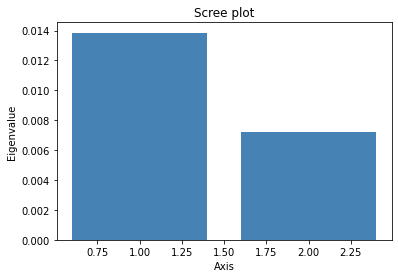

In [11]:
my_ca.plot_eigenvalues()

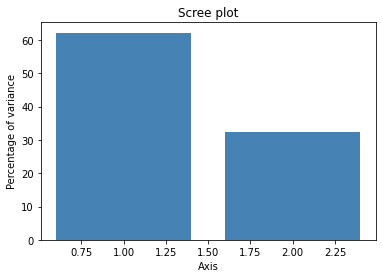

In [12]:
my_ca.plot_eigenvalues(type="percentage")

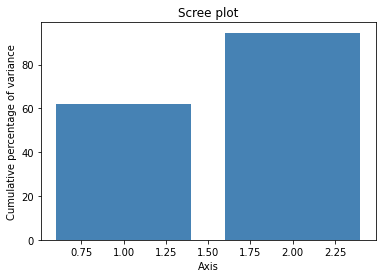

In [13]:
my_ca.plot_eigenvalues(type="cumulative")

Lors de l'exécution de la méthode my_ca.fit(X), les statistiques suivantes ont été calculées :

* my_ca.row_contrib_ : contributions des points lignes à la variance de l'axe
* my_ca.col_contrib_ : contributions des points colonnes à la variance de l'axe
* my_ca.row_cos2_ : cosinus carrés des points lignes
* my_ca.col_cos2_ : cosinus carrés des points colonnes

## Extraction des statistiques sur les points lignes

Export de la totalité des données lignes vers une DataFrame pandas

In [14]:
df_rows = my_ca.row_topandas()
print(df_rows)

                row_coord_dim1  row_coord_dim2  row_contrib_dim1  \
Agriculteur           0.166150        0.309612          5.692772   
Petit.Patr.           0.068377        0.143151          1.184762   
Prof.Cad.Sup         -0.429976        0.060873         74.957901   
Prof.Int.            -0.106603       -0.032597          8.327911   
Employe               0.015729       -0.095469          0.267471   
Ouvr.Qualif.          0.043713       -0.101379          1.538298   
Ouvr.Non-Qual.        0.117797       -0.094864          4.405391   
Inactif               0.032584        0.033395          3.625494   

                row_contrib_dim2  row_cos2_dim1  row_cos2_dim2  
Agriculteur            37.989221       0.213512       0.741407  
Petit.Patr.             9.979255       0.153835       0.674250  
Prof.Cad.Sup            2.887188       0.978183       0.019605  
Prof.Int.               1.496416       0.802207       0.075007  
Employe                18.937575       0.025214       0.928949

In [15]:
# Coordonnées des points lignes
print(my_ca.row_coord_)

[[ 0.16614986  0.30961174]
 [ 0.06837709  0.14315064]
 [-0.42997558  0.06087258]
 [-0.10660251 -0.03259679]
 [ 0.01572857 -0.09546893]
 [ 0.04371252 -0.1013786 ]
 [ 0.11779685 -0.09486419]
 [ 0.0325837   0.03339524]]


In [16]:
# Contributions des points lignes
print(my_ca.row_contrib_)

[[ 5.69277232 37.9892214 ]
 [ 1.18476189  9.97925473]
 [74.95790095  2.88718751]
 [ 8.32791077  1.4964164 ]
 [ 0.26747131 18.93757502]
 [ 1.53829776 15.90094419]
 [ 4.40539088  5.49064526]
 [ 3.62549412  7.31875549]]


In [17]:
# Cos2 des points lignes
print(my_ca.row_cos2_)

[[0.21351182 0.74140722]
 [0.15383515 0.67424994]
 [0.97818335 0.01960542]
 [0.80220729 0.07500692]
 [0.02521427 0.92894899]
 [0.13827479 0.7437446 ]
 [0.55568018 0.36038123]
 [0.37220445 0.39097583]]


## Extraction des statistiques sur les points colonnes

Export de la totalité des données colonnes vers une DataFrame pandas

In [18]:
df_cols = my_ca.col_topandas()
print(df_cols)

            col_coord_dim1  col_coord_dim2  col_contrib_dim1  \
Radio            -0.014940       -0.022106          0.428700   
Tel.              0.053283       -0.002081          6.564128   
Quot.Nat.        -0.540675        0.006207         74.587719   
Quot.Reg.         0.108828        0.109645         11.501128   
Press.Mag.       -0.094813        0.132497          6.823338   
Press.TV          0.009754       -0.161609          0.094987   

            col_contrib_dim2  col_cos2_dim1  col_cos2_dim2  
Radio               1.803681       0.076956       0.168480  
Tel.                0.019242       0.850792       0.001298  
Quot.Nat.           0.018890       0.992981       0.000131  
Quot.Reg.          22.435641       0.486643       0.493977  
Press.Mag.         25.608027       0.316773       0.618623  
Press.TV           50.114518       0.003492       0.958663  


In [19]:
# Coordonnées des points colonnes
print(my_ca.col_coord_)

[[-0.01494022 -0.02210596]
 [ 0.05328288 -0.002081  ]
 [-0.54067502  0.00620677]
 [ 0.10882837  0.10964537]
 [-0.09481257  0.13249659]
 [ 0.00975363 -0.16160888]]


In [20]:
# Contributions des points colonnes
print(my_ca.col_contrib_)

[[4.28700199e-01 1.80368136e+00]
 [6.56412758e+00 1.92419243e-02]
 [7.45877189e+01 1.88897960e-02]
 [1.15011283e+01 2.24356413e+01]
 [6.82333790e+00 2.56080275e+01]
 [9.49870405e-02 5.01145182e+01]]


In [21]:
# Cos2 des points colonnes
print(my_ca.col_cos2_)

[[7.69561735e-02 1.68479830e-01]
 [8.50792093e-01 1.29775661e-03]
 [9.92981084e-01 1.30857685e-04]
 [4.86642767e-01 4.93976885e-01]
 [3.16773320e-01 6.18623139e-01]
 [3.49195247e-03 9.58662728e-01]]


## Représentation graphique

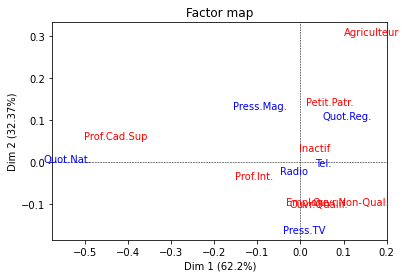

In [22]:
# Mapping simultané des points lignes et colonnes
# Les paramètres de la méthode mapping indiquent que ce sont
#les axes 1 et 2 qui sont ici représentés
my_ca.mapping(num_x_axis=1, num_y_axis=2)#proche de centre de gravite (profil moyen ) donc pas bien represente 

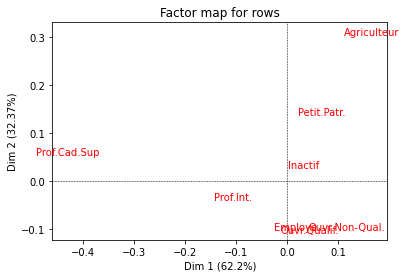

In [23]:
# Mapping des points lignes
my_ca.mapping_row(num_x_axis=1, num_y_axis=2)

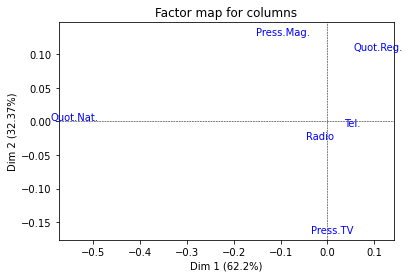

In [24]:
# Mapping des points colonnes
my_ca.mapping_col(num_x_axis=1, num_y_axis=2)

Analyse du 1er axe - Points lignes

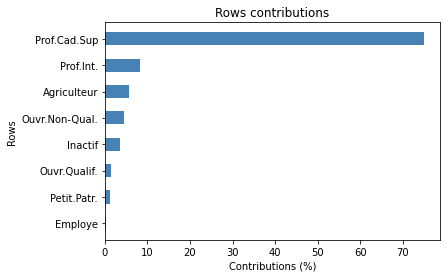

In [25]:
# Classement des points lignes en fonction de leur contribution au 1er axe
# Le paramètre de la méthode plot_row_contrib indique que c'est pour l'axe numéro 1 que les contributions sont ici 
# représentées
my_ca.plot_row_contrib(num_axis=1)

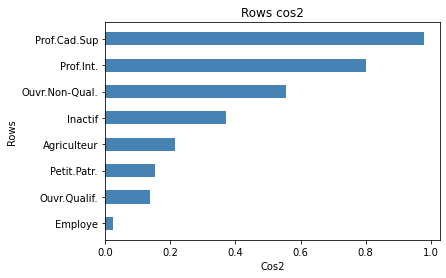

In [26]:
# Classement des points lignes en fonction de leur cos2 sur le 1er axe
my_ca.plot_row_cos2(num_axis=1)

Analyse du 1er axe - Points colonne

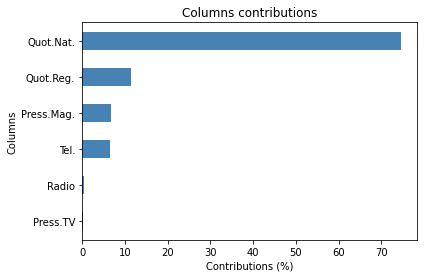

In [27]:
# Classement des points colonnes en fonction de leur contribution au 1er axe
my_ca.plot_col_contrib(num_axis=1)

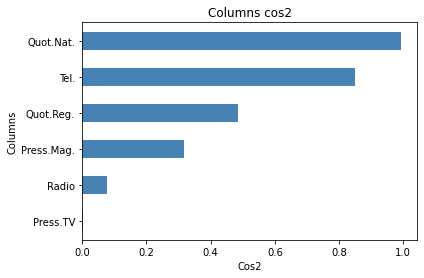

In [28]:
# Classement des points colonnes en fonction de leur cos2 sur le 1er axe
my_ca.plot_col_cos2(num_axis=1)

6